In [2]:
import ROOT
from ROOT import gPad, gStyle

Welcome to JupyROOT 6.24/06


In [3]:
gStyle.SetOptStat(0)

In [38]:
path = '../UndergroundCosmicMuME11At0T+2021/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'
#path = '../CMSSW_12_3_0_pre5__fullsim_PU_2021_14TeV-ZMM_14-00002/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'

In [39]:
root_file = ROOT.TFile(path)

In [40]:
gem_dir = root_file.Get('DQMData/Run 1/GEM/Run summary')
gem_dir.ls()

TDirectoryFile*		Run summary	Run summary
 KEY: TDirectoryFile	Efficiency;1	Efficiency
 KEY: TDirectoryFile	EventInfo;1	EventInfo


In [41]:
eff_dir = gem_dir.Get('Efficiency')
eff_dir.ls()

TDirectoryFile*		Efficiency	Efficiency
 KEY: TDirectoryFile	GEMCSCSegment;1	GEMCSCSegment
 KEY: TDirectoryFile	GLBMuon;1	GLBMuon
 KEY: TDirectoryFile	STAMuon;1	STAMuon


In [72]:
gemcsc_dir = eff_dir.Get('GEMCSCSegment')
glb_dir = eff_dir.Get('GLBMuon')
sta_dir = eff_dir.Get('STAMuon')

In [43]:
gem_list = [
    'GE11-M-L2',
    'GE11-M-L1',
    'GE11-P-L1',
    'GE11-P-L2',
]

color_list = [
    38,
    ROOT.kBlue,
    ROOT.kRed,
    46
]

In [44]:
ROOT.gStyle.SetOptStat(0)

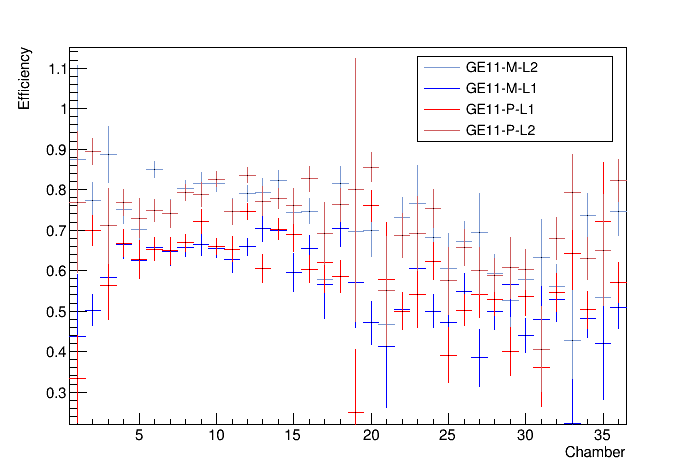

In [45]:
eff_hist = {}

legend = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
for idx, suffix in enumerate(gem_list):
    key = 'Efficiency/eff_chamber_' + suffix
    hist = gemcsc_dir.Get(key)
    eff_hist[key] = hist
    
    color = color_list[idx]
    hist.SetLineColor(color)
    
    hist.SetTitle('')
    
    draw_opt = ''
    if idx > 0:
        draw_opt += ' SAME'
    hist.Draw(draw_opt)
    legend.AddEntry(hist, suffix, 'l')
legend.Draw('SAME')

gPad.SetTitle('')
gPad.Draw()

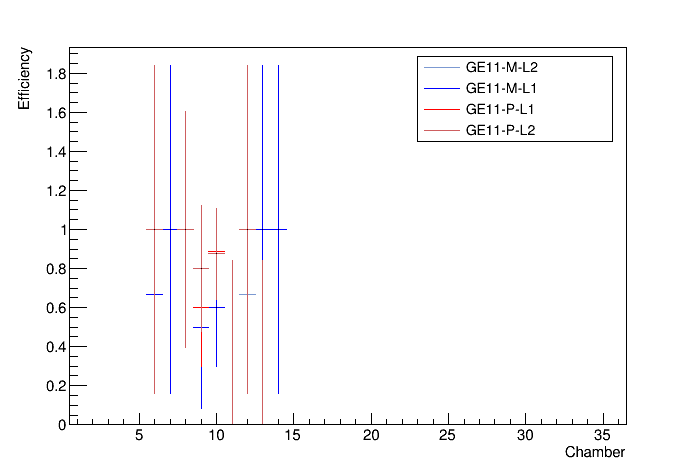

In [66]:


eff_hist = {}

legend = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
for idx, suffix in enumerate(gem_list):
    key = 'Efficiency/eff_chamber_' + suffix
    hist = glb_dir.Get(key)
    eff_hist[key] = hist
    
    color = color_list[idx]
    hist.SetLineColor(color)
    
    hist.SetTitle('')
    
    draw_opt = ''
    if idx > 0:
        draw_opt += ' SAME'
    hist.Draw(draw_opt)
    legend.AddEntry(hist, suffix, 'l')
legend.Draw('SAME')

gPad.SetLogy(False)
gPad.SetTitle('')
gPad.Draw()

In [76]:
sta_dir.Get('Misc').ls()

TDirectoryFile*		Misc	Misc
 OBJ: TH1F	prop_chamber_GE11-M	 GE11-M : 0 at: 0x5f4b460
 OBJ: TH1F	prop_chamber_GE11-P	 GE11-P : 0 at: 0x5f49800
 KEY: TH1F	all_abs_rdphi;1	
 KEY: TH1F	prop_chamber_GE11-M;1	 GE11-M
 KEY: TH1F	prop_chamber_GE11-P;1	 GE11-P
 KEY: TH1F	prop_err_phi_GE11-M;1	 GE11-M
 KEY: TH1F	prop_err_phi_GE11-M_matched;1	 GE11-M
 KEY: TH1F	prop_err_phi_GE11-P;1	 GE11-P
 KEY: TH1F	prop_err_phi_GE11-P_matched;1	 GE11-P
 KEY: TH1F	prop_err_r_GE11-M;1	 GE11-M
 KEY: TH1F	prop_err_r_GE11-M_matched;1	 GE11-M
 KEY: TH1F	prop_err_r_GE11-P;1	 GE11-P
 KEY: TH1F	prop_err_r_GE11-P_matched;1	 GE11-P
 KEY: TH1F	start_det_GE11-M;1	 GE11-M
 KEY: TH1F	start_det_GE11-M_matched;1	 GE11-M
 KEY: TH1F	start_det_GE11-P;1	 GE11-P
 KEY: TH1F	start_det_GE11-P_matched;1	 GE11-P


In [101]:
key = 'start_det'
def draw(input_dir, key, logy=False, suffix=''):
    h_pos = input_dir.Get(f'{key}_GE11-P' + suffix)
    h_neg = input_dir.Get(f'{key}_GE11-M' + suffix)
    h_pos.SetLineColor(ROOT.kRed)
    h_neg.SetLineColor(ROOT.kBlue)

    maximum = max(h_pos.GetMaximum(), h_neg.GetMaximum())
    if logy:
        minimum = 1
        maximum *= 2
    else:
        minimum = 0
        maximum *= 1.02
    h_pos.GetYaxis().SetRangeUser(minimum, maximum)

    h_pos.Draw('HIST E1')
    h_neg.Draw('HIST E1 SAME')

    gPad.SetLogy(logy)
    gPad.Draw()

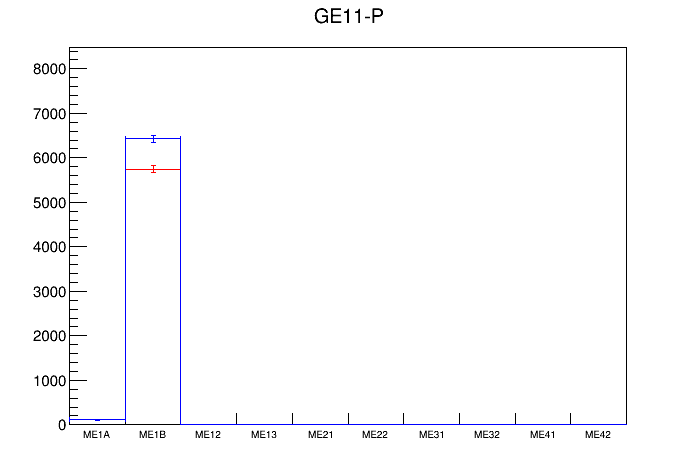

In [108]:
draw(sta_dir, 'Misc/start_det')

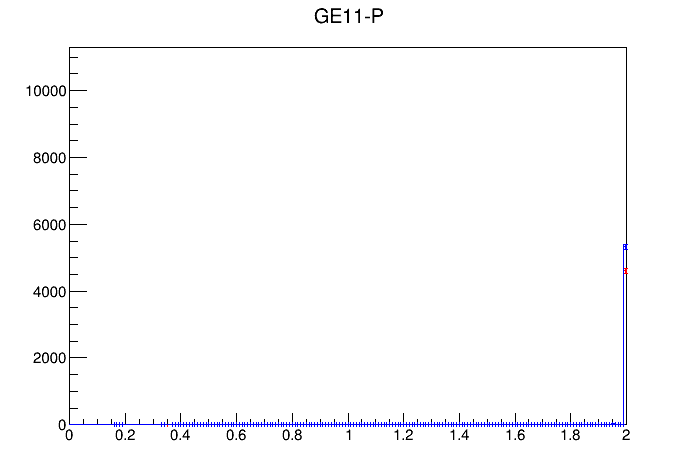

In [110]:
draw(sta_dir, 'Misc/dprop_err_r')

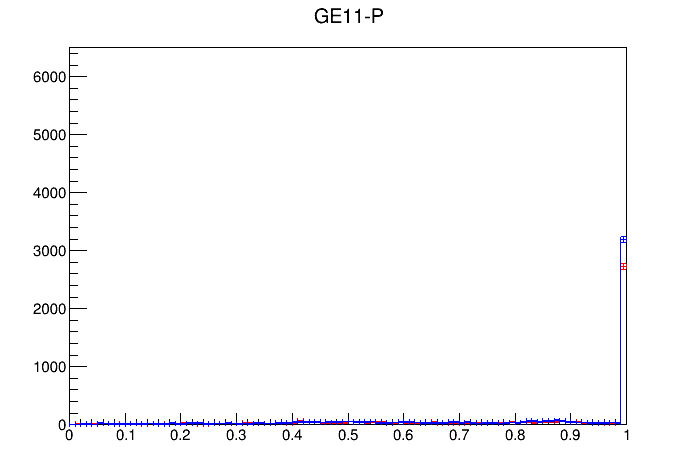

In [99]:
draw(sta_dir, 'prop_err_phi')

In [65]:
draw(sta_dir, key)h = gemcsc_dir.Get('Misc/num_me11_segments_one')
h.Draw('HIST')
gPad.SetLogy()
gPad.Draw()

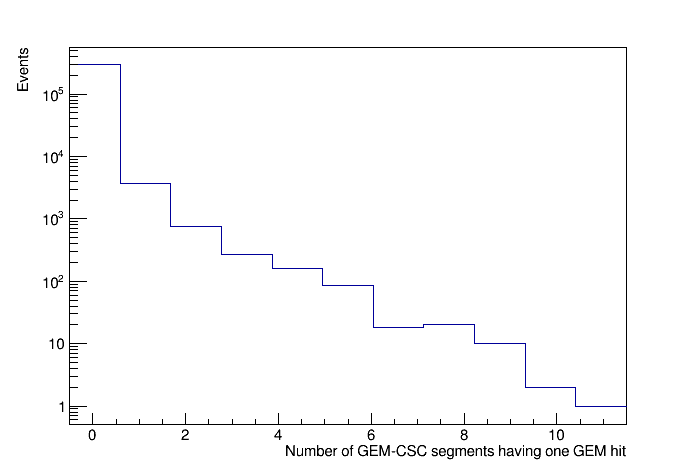